In [1]:
import os
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize, MWETokenizer
from collections import Counter
import seaborn as sns
# got tired of warnings 🙃
import warnings
warnings.filterwarnings('ignore')
from matplotlib import pyplot as plt

# Only need to run once


In [2]:
col_names =['jobTitle','companyName','salary','amount','jobType','position','gender','experience','address','desc']
df = pd.read_csv("topcv13.csv", encoding = "utf-16",names = col_names,header =None,delimiter="', '")

In [3]:
df.head(50)

,jobTitle,companyName,salary,amount,jobType,position,gender,experience,address,desc
0,"""('Nhân Viên IT Support Hệ Thống (Thưởng Tết L...",Công Ty Cổ Phần Công Nghệ Và Truyền Thông Lanit,8-15 triệu,2 người,Toàn thời gian,Nhân viên,Không yêu cầu,1 năm,Hà Nội,Mô tả công việc\n- Quản lý hệ thống máy chủ Li...
1,"""('Unity Game Developer",CÔNG TY CỔ PHẦN IKAME VIỆT NAM,Tới 40 triệu,5 người,Toàn thời gian,Nhân viên,Không yêu cầu,1 năm,Hà Nội,Mô tả công việc\nABOUT IKAMEiKame thành lập và...
2,('Kỹ Sư Nghiên Cứu Và Phát Triển Phần Mềm,CÔNG TY CỔ PHẦN SỞ GIAO DỊCH HÀNG HÓA VIỆT NAM,Thoả thuận,3 người,Toàn thời gian,Nhân viên,Không yêu cầu,Không yêu cầu kinh nghiệm,Hà Nội,Mô tả công việc\n- Thực hiện các hoạt động ngh...
3,"""('Fullstack JavaScript Developer (Vuejs/Nodejs)",Azoom VietNam Inc,14-45 triệu,10 người,Toàn thời gian,Nhân viên,Không yêu cầu,1 năm,Hà Nội,Mô tả công việc\nAzoom Vietnam đang trong quá ...
4,('Lập Trình Viên Frontend ( Web Designer Wordp...,CÔNG TY TNHH SAPAN VIỆT NAM,12-18 triệu,2 người,Toàn thời gian,Nhân viên,Nam,1 năm,Hà Nội,Mô tả công việc\n- Code layout website dùng HT...
5,('Web Developer (Upto $2500),CÔNG TY CỔ PHẦN STRINGEE,"Tới 2,500 USD",2 người,Toàn thời gian,Nhân viên,Không yêu cầu,Dưới 1 năm,Hà Nội,Mô tả công việc\n●\tChịu trách nhiệm nghiên cứ...
6,('Nhân Viên Xử Lý Dữ Liệu Ảnh (Không Yêu Cầu K...,"INFINIQ Vietnam Co.,ltd",6.5-10 triệu,20 người,Toàn thời gian,Nhân viên,Không yêu cầu,Không yêu cầu kinh nghiệm,Hà Nội,Mô tả công việc\nSử dụng công cụ máy tính và t...
7,"""('Lập Trình Viên Backend (.Net, .Net Core, As...",Công ty Cổ phần MISA,Tới 40 triệu,3 người,Toàn thời gian,Nhân viên,Không yêu cầu,1 năm,Hà Nội,Mô tả công việc\nTham gia phát triển các sản p...
8,"""('Nhân Viên Kỹ Thuật Tại Hải Phòng (Thu Nhập ...",Công ty Cổ phần Viễn Thông VNNET,7-20 triệu,10 người,Toàn thời gian,Nhân viên,Nam,Không yêu cầu kinh nghiệm,Hải Phòng,Mô tả công việc\n- Triển khai lắp đặt cáp hạ t...
9,('Trưởng Nhóm Kỹ Thuật (Technical Lead),Công ty Apollosoft,Thoả thuận,1 người,Toàn thời gian,Trưởng nhóm,Không yêu cầu,3 năm,NaN,Mô tả công việc\n- Thực hiện các nhiệm vụ được...


In [4]:
df["jobTitle"]= df["jobTitle"].str.replace("'","")

In [5]:
df["jobTitle"]= df["jobTitle"].str.replace('"','')

In [6]:
print(df['companyName'].unique())


['Công Ty Cổ Phần Công Nghệ Và Truyền Thông Lanit'
 'CÔNG TY CỔ PHẦN IKAME VIỆT NAM'
 'CÔNG TY CỔ PHẦN SỞ GIAO DỊCH HÀNG HÓA VIỆT NAM' ... 'BonBonGame'
 'Công ty Cổ phần Nghe nhìn Toàn Cầu AVG' 'Công ty TNHH Ambition Việt Nam']


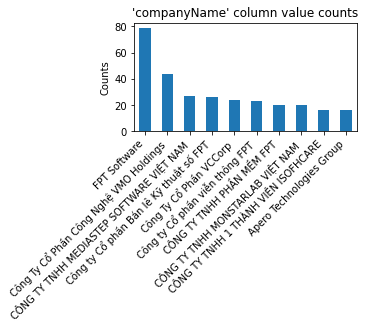

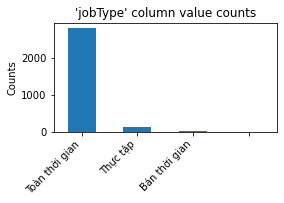

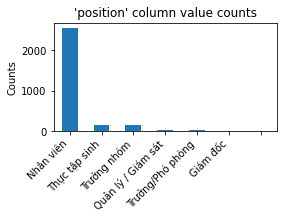

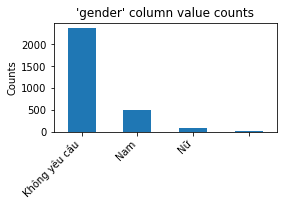

In [6]:
def eda_plot(column, topn=10):
    plt.figure(figsize=(4, 2))
    df[column].value_counts().nlargest(topn).plot(kind='bar')
    plt.title(f"'{column}' column value counts")
    plt.ylabel("Counts")
    plt.xticks(rotation = 45, ha='right')
    plt.show()

columns = ["companyName","jobType","position","gender"]

for column in columns:
    eda_plot(column)

In [8]:
string = ""
for x in (df["desc"] + " " + df["jobTitle"]):
    x1 = str(x)
    x1 = x1.lower().strip()
    string += str(x1)
nltk_tokens = nltk.word_tokenize(string)
keyword_field =['fullstack','backend','frontend', 'mobile',' game','embedded','product_owner','product_manager','business_analyst','project_manager','project_leader'
                ,'tester', 'qa/qc','system_engineer', 'system_admin','devops','data','erp','solution_architect']
keyword_title=['business_analyst','project_manager','bridge_engineer','data_analyst','product_manager','devops','it_support','designer','manager','qa','qc', 'scrum', 'ui','ux'   ]
keyword_language=['objective_c','visual_basic', 'android', 'angular', 'angularjs', 'asp.net', 'c#', 'c++', 'c',  'cocos', 'css', 'dart','devops', 'django', 'drupal',  'english', 'erp', 'flutter',  'golang', 'html5', 'ios',  'j2ee', 'japanese', 'java', 'javascript', 'jquery', 'json', 'kotlin', 'laravel', 'linux', 'magento', 'mvc', 'mysql', '.net', 'networking', 'nodejs', 'nosql', 'oop', 'oracle', 'php', 'postgresql',  'python', 'reactjs', 'ruby', 'salesforce', 'scala','sharepoint', 'spring', 'sql', 'swift', 'tester', 'typescript', 'unity', 'vuejs', 'wordpress', 'xamarin']
multi_tokens = [('business', 'analyst'), ('project', 'manager'), ('objective', 'c'),('bridge', 'engineer'),('product', 'manager'),('it', 'support'),
                    ('visual', 'basic')]
keyword = keyword_field + keyword_title + keyword_language
tokenizer = MWETokenizer(multi_tokens)
sentence_list1 = nltk_tokens
sentence_list1 = tokenizer.tokenize(sentence_list1)
dictionary1={}
for item in keyword:
    dictionary1[item]=0
for item in sentence_list1:
    if item in keyword:
        dictionary1[item] += 1

print(dictionary1)

{'fullstack': 60, 'backend': 344, 'frontend': 506, 'mobile': 634, ' game': 0, 'embedded': 46, 'product_owner': 0, 'product_manager': 16, 'business_analyst': 117, 'project_manager': 93, 'project_leader': 0, 'tester': 174, 'qa/qc': 14, 'system_engineer': 0, 'system_admin': 0, 'devops': 178, 'data': 846, 'erp': 124, 'solution_architect': 0, 'bridge_engineer': 0, 'data_analyst': 0, 'it_support': 35, 'designer': 108, 'manager': 95, 'qa': 133, 'qc': 63, 'scrum': 198, 'ui': 166, 'ux': 93, 'objective_c': 15, 'visual_basic': 2, 'android': 349, 'angular': 172, 'angularjs': 50, 'asp.net': 107, 'c#': 0, 'c++': 50, 'c': 224, 'cocos': 17, 'css': 348, 'dart': 15, 'django': 37, 'drupal': 7, 'english': 463, 'flutter': 141, 'golang': 51, 'html5': 132, 'ios': 291, 'j2ee': 22, 'japanese': 117, 'java': 738, 'javascript': 562, 'jquery': 188, 'json': 102, 'kotlin': 46, 'laravel': 180, 'linux': 298, 'magento': 91, 'mvc': 236, 'mysql': 358, '.net': 519, 'networking': 57, 'nodejs': 253, 'nosql': 87, 'oop': 255,

In [7]:
keyword_field =['fullstack','backend','frontend','data','machine_learning', 'ai','agile','aws', 'azure', 'blockchain','database','embedded','game','cloud','tester']
keyword_title=['developer','business_analyst','project_manager','bridge_engineer','data_analyst','product_manager','devops','it_support','designer','manager','qa','qc', 'scrum', 'ui','ux','bridge','it_helpdesk']
keyword_language=['objective_c','visual_basic', 'javascript', 'c#', 'c++', 'c',  'java', 'php','python','golang', 'japanese', 'java', 'scala','sql','kotlin','swift','go','html/css','shell','ruby','dart','react','reactjs','nodejs']
multi_tokens = [('business', 'analyst'), ('project', 'manager'), ('machine', 'learning'), ('objective', 'c')
                ,('data', 'analyst'),('product', 'manager'),('it', 'support'), ('it','helpdesk'),
                    ('visual', 'basic')]

df['language'] = ''
for index, row in df.iterrows():
    detail = row.desc.lower().strip() + row.jobTitle.lower().strip()
    detail = nltk.word_tokenize(detail)
    tokenizer = MWETokenizer(multi_tokens)
    detail = tokenizer.tokenize(detail)
    detail = list(set(detail))
    detail = [word for word in detail if word in keyword_language]
    df.at[index, 'language'] = detail
df['field'] = ''
for index, row in df.iterrows():
    detail = row.desc.lower().strip() + row.jobTitle.lower().strip()
    detail = nltk.word_tokenize(detail)
    tokenizer = MWETokenizer(multi_tokens)
    detail = tokenizer.tokenize(detail)
    detail = list(set(detail))
    detail = [word for word in detail if word in keyword_field]
    df.at[index, 'field'] = detail
df['title'] = ''
for index, row in df.iterrows():
    detail = row.desc.lower().strip() + row.jobTitle.lower().strip()
    detail = nltk.word_tokenize(detail)
    tokenizer = MWETokenizer(multi_tokens)
    detail = tokenizer.tokenize(detail)
    detail = list(set(detail))
    detail = [word for word in detail if word in keyword_title]
    df.at[index, 'title'] = detail

In [8]:
df.head(10)

,jobTitle,companyName,salary,amount,jobType,position,gender,experience,address,desc,language,field,title
0,(Nhân Viên IT Support Hệ Thống (Thưởng Tết Lên...,Công Ty Cổ Phần Công Nghệ Và Truyền Thông Lanit,8-15 triệu,2 người,Toàn thời gian,Nhân viên,Không yêu cầu,1 năm,Hà Nội,Mô tả công việc\n- Quản lý hệ thống máy chủ Li...,[],[cloud],[it_support]
1,(Unity Game Developer,CÔNG TY CỔ PHẦN IKAME VIỆT NAM,Tới 40 triệu,5 người,Toàn thời gian,Nhân viên,Không yêu cầu,1 năm,Hà Nội,Mô tả công việc\nABOUT IKAMEiKame thành lập và...,[c],[game],"[developer, ui]"
2,(Kỹ Sư Nghiên Cứu Và Phát Triển Phần Mềm,CÔNG TY CỔ PHẦN SỞ GIAO DỊCH HÀNG HÓA VIỆT NAM,Thoả thuận,3 người,Toàn thời gian,Nhân viên,Không yêu cầu,Không yêu cầu kinh nghiệm,Hà Nội,Mô tả công việc\n- Thực hiện các hoạt động ngh...,[nodejs],[],[]
3,(Fullstack JavaScript Developer (Vuejs/Nodejs),Azoom VietNam Inc,14-45 triệu,10 người,Toàn thời gian,Nhân viên,Không yêu cầu,1 năm,Hà Nội,Mô tả công việc\nAzoom Vietnam đang trong quá ...,"[javascript, nodejs]",[fullstack],[developer]
4,(Lập Trình Viên Frontend ( Web Designer Wordpr...,CÔNG TY TNHH SAPAN VIỆT NAM,12-18 triệu,2 người,Toàn thời gian,Nhân viên,Nam,1 năm,Hà Nội,Mô tả công việc\n- Code layout website dùng HT...,[],[frontend],[designer]
5,(Web Developer (Upto $2500),CÔNG TY CỔ PHẦN STRINGEE,"Tới 2,500 USD",2 người,Toàn thời gian,Nhân viên,Không yêu cầu,Dưới 1 năm,Hà Nội,Mô tả công việc\n●\tChịu trách nhiệm nghiên cứ...,"[javascript, php]",[],[developer]
6,(Nhân Viên Xử Lý Dữ Liệu Ảnh (Không Yêu Cầu Ki...,"INFINIQ Vietnam Co.,ltd",6.5-10 triệu,20 người,Toàn thời gian,Nhân viên,Không yêu cầu,Không yêu cầu kinh nghiệm,Hà Nội,Mô tả công việc\nSử dụng công cụ máy tính và t...,[],[],[]
7,"(Lập Trình Viên Backend (.Net, .Net Core, Asp....",Công ty Cổ phần MISA,Tới 40 triệu,3 người,Toàn thời gian,Nhân viên,Không yêu cầu,1 năm,Hà Nội,Mô tả công việc\nTham gia phát triển các sản p...,"[reactjs, sql, java]","[blockchain, ai, machine_learning, backend]",[]
8,(Nhân Viên Kỹ Thuật Tại Hải Phòng (Thu Nhập Từ...,Công ty Cổ phần Viễn Thông VNNET,7-20 triệu,10 người,Toàn thời gian,Nhân viên,Nam,Không yêu cầu kinh nghiệm,Hải Phòng,Mô tả công việc\n- Triển khai lắp đặt cáp hạ t...,[],[],[]
9,(Trưởng Nhóm Kỹ Thuật (Technical Lead),Công ty Apollosoft,Thoả thuận,1 người,Toàn thời gian,Trưởng nhóm,Không yêu cầu,3 năm,NaN,Mô tả công việc\n- Thực hiện các nhiệm vụ được...,"[javascript, react, c]",[],[]


In [9]:
def filtered_keywords(jobs_filtered, keywords, title="Keyword Analysis", head=15):
    # get keywords in a column
    count_keywords = pd.DataFrame(jobs_filtered.language.sum()).value_counts().rename_axis('keywords').reset_index(name='counts')

    # get frequency of occurence of word (as word only appears once per line)
    length = len(jobs_filtered) # number of job postings
    count_keywords['percentage'] = 100 * count_keywords.counts / length

    # plot the results
    count_keywords = count_keywords[count_keywords.keywords.isin(keywords)]
    count_keywords = count_keywords.head(head)
    g = plt.bar(x="keywords", height="percentage", data=count_keywords , color=np.random.rand(len(count_keywords.keywords), 3))
    plt.xlabel("")
    plt.ylabel("Likelyhood to be in job posting (%)")
    plt.xticks(rotation = 45, ha='right')
    plt.title(title) 
    plt.show(g)
    print(count_keywords)

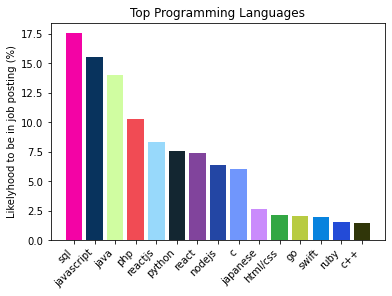

      keywords  counts  percentage
0          sql     518   17.571235
1   javascript     457   15.502035
2         java     412   13.975577
3          php     303   10.278155
4      reactjs     246    8.344640
5       python     222    7.530529
6        react     219    7.428765
7       nodejs     187    6.343284
8            c     179    6.071913
9     japanese      78    2.645862
10    html/css      62    2.103121
11          go      60    2.035278
12       swift      57    1.933514
13        ruby      46    1.560380
14         c++      44    1.492537


In [10]:
filtered_keywords(df,keyword_language , title="Top Programming Languages")

In [13]:
def filtered_field(jobs_filtered, keywords, title="Keyword Analysis", head=15):
    # get keywords in a column
    count_keywords = pd.DataFrame(jobs_filtered.field.sum()).value_counts().rename_axis('keywords').reset_index(name='counts')

    # get frequency of occurence of word (as word only appears once per line)
    length = len(jobs_filtered) # number of job postings
    count_keywords['percentage'] = 100 * count_keywords.counts / length

    # plot the results
    count_keywords = count_keywords[count_keywords.keywords.isin(keywords)]
    count_keywords = count_keywords.head(head)
    g = plt.bar(x="keywords", height="percentage", data=count_keywords , color=np.random.rand(len(count_keywords.keywords), 3))
    plt.xlabel("")
    plt.ylabel("Likelyhood to be in job posting (%)")
    plt.xticks(rotation = 45, ha='right')
    plt.title(title) 
    plt.show(g)
    print(count_keywords)

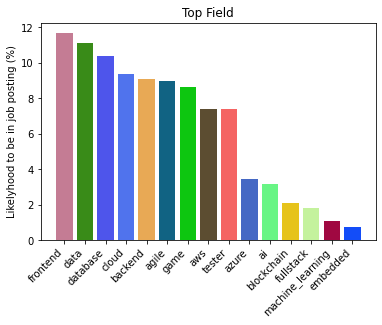

            keywords  counts  percentage
0           frontend     344   11.668928
1               data     327   11.092266
2           database     305   10.345997
3              cloud     276    9.362280
4            backend     267    9.056988
5              agile     265    8.989145
6               game     254    8.616011
7                aws     218    7.394844
8             tester     217    7.360923
9              azure     102    3.459973
10                ai      93    3.154681
11        blockchain      61    2.069199
12         fullstack      53    1.797829
13  machine_learning      32    1.085482
14          embedded      22    0.746269


In [14]:
filtered_field(df,keyword_field , title="Top Field")

In [17]:
def filtered_title(jobs_filtered, keywords, title="Keyword Analysis", head=15):
    # get keywords in a column
    count_keywords = pd.DataFrame(jobs_filtered.title.sum()).value_counts().rename_axis('keywords').reset_index(name='counts')

    # get frequency of occurence of word (as word only appears once per line)
    length = len(jobs_filtered) # number of job postings
    count_keywords['percentage'] = 100 * count_keywords.counts / length

    # plot the results
    count_keywords = count_keywords[count_keywords.keywords.isin(keywords)]
    count_keywords = count_keywords.head(head)
    g = plt.bar(x="keywords", height="percentage", data=count_keywords , color=np.random.rand(len(count_keywords.keywords), 3))
    plt.xlabel("")
    plt.ylabel("Likelyhood to be in job posting (%)")
    plt.xticks(rotation = 45, ha='right')
    plt.title(title) 
    plt.show(g)
    print(count_keywords)

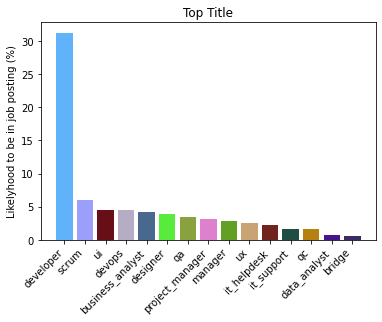

            keywords  counts  percentage
0          developer     921   31.241520
1              scrum     175    5.936228
2                 ui     134    4.545455
3             devops     133    4.511533
4   business_analyst     122    4.138399
5           designer     113    3.833107
6                 qa     103    3.493894
7    project_manager      91    3.086839
8            manager      84    2.849389
9                 ux      75    2.544098
10       it_helpdesk      67    2.272727
11        it_support      48    1.628223
12                qc      48    1.628223
13      data_analyst      21    0.712347
14            bridge      19    0.644505


In [18]:
filtered_title(df,keyword_title , title="Top Title")

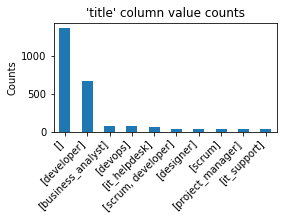

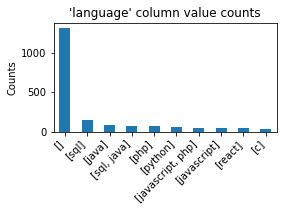

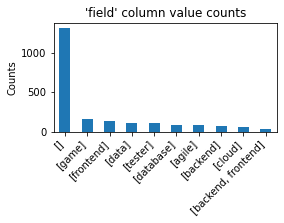

In [19]:
def eda_plot(column, topn=10):
    plt.figure(figsize=(4, 2))
    df[column].value_counts().nlargest(topn).plot(kind='bar')
    plt.title(f"'{column}' column value counts")
    plt.ylabel("Counts")
    plt.xticks(rotation = 45, ha='right')
    plt.show()

columns = ['title',"language","field"]

for column in columns:
    eda_plot(column)

In [20]:
string1 = '- Thành thạo các ngôn ngữ lập trình NodeJS, ASP.Net, Python.'
string1= string1.lower().strip()
string1 = nltk.word_tokenize(string1)
print (string1)

['-', 'thành', 'thạo', 'các', 'ngôn', 'ngữ', 'lập', 'trình', 'nodejs', ',', 'asp.net', ',', 'python', '.']


### Salary Cleaning - Min/ Max/ Median/ Mean

In [6]:
df['salary']=df['salary'].str.replace("Tới ","0-").str.replace("Trên ",">")


df['salary_min'] = np.where(df.salary.str.contains("-") | df.salary.str.contains(">"), df.salary, np.NaN)


In [7]:
df.head(1000)

,jobTitle,companyName,salary,amount,jobType,position,gender,experience,address,desc,salary_min
0,(Nhân Viên IT Support Hệ Thống (Thưởng Tết Lên...,Công Ty Cổ Phần Công Nghệ Và Truyền Thông Lanit,8-15 triệu,2 người,Toàn thời gian,Nhân viên,Không yêu cầu,1 năm,Hà Nội,Mô tả công việc\n- Quản lý hệ thống máy chủ Li...,8-15 triệu
1,(Unity Game Developer,CÔNG TY CỔ PHẦN IKAME VIỆT NAM,0-40 triệu,5 người,Toàn thời gian,Nhân viên,Không yêu cầu,1 năm,Hà Nội,Mô tả công việc\nABOUT IKAMEiKame thành lập và...,0-40 triệu
2,(Kỹ Sư Nghiên Cứu Và Phát Triển Phần Mềm,CÔNG TY CỔ PHẦN SỞ GIAO DỊCH HÀNG HÓA VIỆT NAM,Thoả thuận,3 người,Toàn thời gian,Nhân viên,Không yêu cầu,Không yêu cầu kinh nghiệm,Hà Nội,Mô tả công việc\n- Thực hiện các hoạt động ngh...,NaN
3,(Fullstack JavaScript Developer (Vuejs/Nodejs),Azoom VietNam Inc,14-45 triệu,10 người,Toàn thời gian,Nhân viên,Không yêu cầu,1 năm,Hà Nội,Mô tả công việc\nAzoom Vietnam đang trong quá ...,14-45 triệu
4,(Lập Trình Viên Frontend ( Web Designer Wordpr...,CÔNG TY TNHH SAPAN VIỆT NAM,12-18 triệu,2 người,Toàn thời gian,Nhân viên,Nam,1 năm,Hà Nội,Mô tả công việc\n- Code layout website dùng HT...,12-18 triệu
...,...,...,...,...,...,...,...,...,...,...,...
995,(Thực Tập Sinh IT Devops Có Lương,Công ty TNHH Phát triển Giáo dục Antoree,3-4 triệu,3 người,Thực tập,Thực tập sinh,Không yêu cầu,Không yêu cầu kinh nghiệm,Hồ Chí Minh,Mô tả công việc\nBuild and maintain AWS cloud ...,3-4 triệu
996,(Technical Leader ( Java )/ Senior Java,TNHH Pirago Việt Nam,0-50 triệu,1 người,Toàn thời gian,Trưởng nhóm,Không yêu cầu,4 năm,Hà Nội,Mô tả công việc\nTham gia phát triển các ứng d...,0-50 triệu
997,(Thực Tập Sinh IT Backend Engineer PHP Có Lương,Công ty TNHH Phát triển Giáo dục Antoree,3-4 triệu,2 người,Thực tập,Thực tập sinh,Không yêu cầu,Không yêu cầu kinh nghiệm,Hồ Chí Minh,"Mô tả công việc\nTham gia nghiên cứu, phát tri...",3-4 triệu
998,(Kỹ Sư Mạng Và An Toàn Thông Tin (Fresher),Công ty cổ phần tư vấn chuyển giao công nghệ ITC,>9 triệu,3 người,Toàn thời gian,Nhân viên,Nam,Dưới 1 năm,Hà Nội,Mô tả công việc\n- Nghiên cứu sản phẩm và giải...,>9 triệu


In [8]:
df['salary_min']=df['salary_min'].str.replace("triệu","").replace("USD","").replace(",","")

In [9]:
df[['salary_min', 'salary_max']] = df.salary_min.str.split("-", 1, expand=True)

In [40]:
df[df['salary_min'].isna()]


,jobTitle,companyName,salary,amount,jobType,position,gender,experience,address,desc,salary_min,salary_max
2,(Kỹ Sư Nghiên Cứu Và Phát Triển Phần Mềm,CÔNG TY CỔ PHẦN SỞ GIAO DỊCH HÀNG HÓA VIỆT NAM,Thoả thuận,3 người,Toàn thời gian,Nhân viên,Không yêu cầu,Không yêu cầu kinh nghiệm,Hà Nội,Mô tả công việc\n- Thực hiện các hoạt động ngh...,NaN,None
9,(Trưởng Nhóm Kỹ Thuật (Technical Lead),Công ty Apollosoft,Thoả thuận,1 người,Toàn thời gian,Trưởng nhóm,Không yêu cầu,3 năm,NaN,Mô tả công việc\n- Thực hiện các nhiệm vụ được...,NaN,None
10,(Giảng Viên Công Nghệ Thông Tin_Bình Định,TỔ CHỨC GIÁO DỤC FPT,Thoả thuận,10 người,Toàn thời gian,Nhân viên,Không yêu cầu,Không yêu cầu kinh nghiệm,Bình Định,Mô tả công việc\nGiảng dạy các môn học phù hợp...,NaN,None
11,(Servicenow Developer,SCC VIETNAM,Thoả thuận,1 người,Toàn thời gian,Nhân viên,Không yêu cầu,2 năm,Hồ Chí Minh,Mô tả công việc\nServiceNow is a global cloud ...,NaN,None
15,"(Mid Developer _Hồ Chí Minh (Back End, 2 Năm K...",Công ty Cổ phần Công Nghệ Vũ Thảo,Thoả thuận,7 người,Toàn thời gian,Nhân viên,Không yêu cầu,2 năm,Hồ Chí Minh,Mô tả công việc\n-\tTham gia phát triển các hệ...,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...
2935,(.Net Tech Lead,Niteco,Thoả thuận,3 người,Toàn thời gian,Trưởng nhóm,Không yêu cầu,2 năm,NaN,Mô tả công việc\nAs Technical Leader working i...,NaN,None
2936,(.Net Developers,Niteco,Thoả thuận,5 người,Toàn thời gian,Nhân viên,Không yêu cầu,4 năm,Hồ Chí Minh,Mô tả công việc\nWe have multiple teams workin...,NaN,None
2937,(IT Security,CÔNG TY TNHH GLEADS,Thoả thuận,1 người,Toàn thời gian,Nhân viên,Không yêu cầu,1 năm,Hồ Chí Minh,Mô tả công việc\nKiểm duyệt về bảo mật cho các...,NaN,None
2941,(Frontend Developer (Reactjs),Nichietsu,Thoả thuận,2 người,Toàn thời gian,Nhân viên,Không yêu cầu,2 năm,Hồ Chí Minh,"Mô tả công việc\n• Hybrid (2day/week), english...",NaN,None


In [10]:
df['salary_min']=df['salary_min'].str.replace(">","").str.replace(",","")

In [11]:
df1 = df.dropna()
df1["salary_min"]=df1['salary_min'].astype(float)

In [12]:
df1["salary_max"]=df1["salary_max"].str.replace(",","").str.replace("USD","")

In [13]:
df1["salary_max"]=df1['salary_max'].astype(float)

In [14]:
df1['salary_max'] = np.where(df1.salary_max > 200, (df1.salary_max)/50, df1.salary_max)
df1['salary_min'] = np.where(df1.salary_min > 200, (df1.salary_min)/50, df1.salary_min)


In [18]:
df1.head(100)

,jobTitle,companyName,salary,amount,jobType,position,gender,experience,address,desc,salary_min,salary_max,salary_avg
0,(Nhân Viên IT Support Hệ Thống (Thưởng Tết Lên...,Công Ty Cổ Phần Công Nghệ Và Truyền Thông Lanit,8-15 triệu,2 người,Toàn thời gian,Nhân viên,Không yêu cầu,1 năm,Hà Nội,Mô tả công việc\n- Quản lý hệ thống máy chủ Li...,8.0,15.0,11.5
1,(Unity Game Developer,CÔNG TY CỔ PHẦN IKAME VIỆT NAM,0-40 triệu,5 người,Toàn thời gian,Nhân viên,Không yêu cầu,1 năm,Hà Nội,Mô tả công việc\nABOUT IKAMEiKame thành lập và...,0.0,40.0,20.0
3,(Fullstack JavaScript Developer (Vuejs/Nodejs),Azoom VietNam Inc,14-45 triệu,10 người,Toàn thời gian,Nhân viên,Không yêu cầu,1 năm,Hà Nội,Mô tả công việc\nAzoom Vietnam đang trong quá ...,14.0,45.0,29.5
4,(Lập Trình Viên Frontend ( Web Designer Wordpr...,CÔNG TY TNHH SAPAN VIỆT NAM,12-18 triệu,2 người,Toàn thời gian,Nhân viên,Nam,1 năm,Hà Nội,Mô tả công việc\n- Code layout website dùng HT...,12.0,18.0,15.0
5,(Web Developer (Upto $2500),CÔNG TY CỔ PHẦN STRINGEE,"0-2,500 USD",2 người,Toàn thời gian,Nhân viên,Không yêu cầu,Dưới 1 năm,Hà Nội,Mô tả công việc\n●\tChịu trách nhiệm nghiên cứ...,0.0,50.0,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,(Flutter Developer,Công ty TNHH Kiaisoft Việt Nam,"0-1,500 USD",1 người,Toàn thời gian,Nhân viên,Không yêu cầu,2 năm,Hà Nội,"Mô tả công việc\nThiết kế, phát triển và tối ư...",0.0,30.0,15.0
160,(Frontend Developer (Angular),Công ty TNHH Kiaisoft Việt Nam,0-30 triệu,1 người,Toàn thời gian,Nhân viên,Không yêu cầu,1 năm,Hà Nội,Mô tả công việc\nTham gia vào các dự án phần m...,0.0,30.0,15.0
163,(Java Developer (Từ 01 Năm Kinh Nghiệm) - Upto...,CÔNG TY TNHH DỊCH VỤ ĐA PHƯƠNG TIỆN VÀ CÔNG NG...,0-40 triệu,5 người,Toàn thời gian,Nhân viên,Không yêu cầu,1 năm,Hà Nội,Mô tả công việc\nPhát triển dịch vụ web bằng J...,0.0,40.0,20.0
174,(Lập Trình Viên C# . Net,CÔNG TY TNHH RABILOO,15-25 triệu,2 người,Toàn thời gian,Nhân viên,Không yêu cầu,1 năm,Hà Nội,Mô tả công việc\nTham gia phát triển các tính ...,15.0,25.0,20.0


In [17]:
df1['salary_avg'] = (df1.salary_min +df1.salary_max)/2

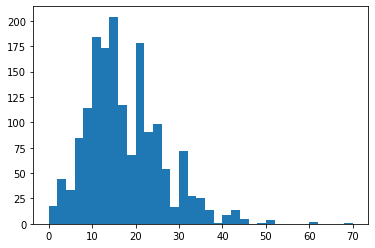

In [47]:
plt.hist(df1.salary_avg,range=[0, 70],bins = 35)
plt.show()

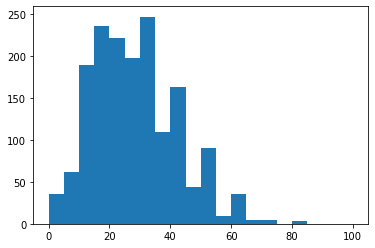

In [50]:
plt.hist(df1.salary_max,range=[0, 100],bins = 20)
plt.show()

## EDA